In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import os
customer=pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


# 1.a. In case age is less than 18, replace it with mean of age values.

In [3]:
customer['Age']= customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()



# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)
 

In [4]:
spend=pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\Case Study 2 - Credit Card Case Study\spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [5]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [7]:
customer_spend=pd.merge(left=customer,right=spend,on='Customer',how='inner')
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [8]:
customer_spend['Amount']=customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount']=(50*customer_spend['Limit']).div(100)
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,250000.0
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,250000.0
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,250000.0
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,250000.0


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [9]:
repayment=pd.read_csv(r"D:\Analytix lab\Senthamizhselvi Datascience_360\PYTHON\CASE STUDY\Case Study 2 - Credit Card Case Study\Repayment.csv")
repayment = repayment.iloc[:,:-1]

In [10]:
repayment.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [11]:
customer_repay=pd.merge(left=customer_spend,right=repayment,on='Customer',how='left')
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,NaN,12-Jan-04,495414.75
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,2.0,3-Jan-04,245899.02
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,3.0,15-Jan-04,259490.06
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,4.0,25-Jan-04,437555.12
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,5.0,17-Jan-05,165972.88


In [12]:
customer_repay.columns =['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount_Spend', 'SL No:', 'Month_y',
       'Repayment_Amount']

In [13]:
customer_repay['Repayment_Amount'] = customer_repay.loc[customer_repay['Repayment_Amount']>customer_repay['Limit'],'Repayment_Amount']=customer_repay['Limit']
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount_Spend,SL No:,Month_y,Repayment_Amount
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,NaN,12-Jan-04,500000.0
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,2.0,3-Jan-04,500000.0
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,3.0,15-Jan-04,500000.0
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,4.0,25-Jan-04,500000.0
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,250000.0,5.0,17-Jan-05,500000.0


In [14]:
customer_repay = customer_repay.drop(columns=['Month_y'],axis=1)

# 2. From the above dataset create the following summaries:

# a. How many distinct customers exist?
unique_customers=customer['Customer'].nunique()


In [15]:
unique_customers=customer['Customer'].nunique()

unique_customers

100

# b. How many distinct categories exist?

In [16]:
customer['Segment'].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

# c. What is the average monthly spend by customers?

In [17]:
spend['Month'] = pd.to_datetime(spend['Month'])
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend_group= round(spend.groupby(['Yearly','Monthly'])['Amount'].mean())
customer_spend_group

C:\Users\DELL\AppData\Local\Temp\ipykernel_2292\1207338661.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spend['Month'] = pd.to_datetime(spend['Month'])


Yearly  Monthly  
2004    April        235272.0
        February     221215.0
        January      251712.0
        March        232146.0
        May          217539.0
        November     270486.0
        September    310923.0
2005    April        252181.0
        August       233735.0
        December     147503.0
        February     229802.0
        January      292741.0
        July         229117.0
        June         262688.0
        May          245697.0
        November     286143.0
        October      194569.0
        September    188666.0
2006    April        232469.0
        August       240700.0
        December     270471.0
        February     253858.0
        January      282058.0
        July         287505.0
        June         177252.0
        March        247166.0
        May          236163.0
        November     182841.0
        October      236136.0
        September    158520.0
Name: Amount, dtype: float64

# d. What is the average monthly repayment by customers?


In [24]:
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount_Spend,SL No:,Repayment_Amount,Monthly,Yearly
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,NaN,500000.0,January,2004
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,2.0,500000.0,January,2004
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,3.0,500000.0,January,2004
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,4.0,500000.0,January,2004
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,5.0,500000.0,January,2004


In [25]:
customer_repay.groupby(['Customer','Monthly'])['Repayment_Amount'].mean()

Customer  Monthly 
A1        April       500000.0
          August      500000.0
          February    500000.0
          January     500000.0
          May         500000.0
                        ...   
A95       January     500000.0
A96       January     100000.0
A97       January      10000.0
A98       January      10001.0
A99       January      10002.0
Name: Repayment_Amount, Length: 578, dtype: float64

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

In [26]:
customer_repay.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'Sl No:', 'Month', 'Type', 'Amount_Spend', 'SL No:',
       'Repayment_Amount', 'Monthly', 'Yearly'],
      dtype='object')

In [29]:
# customer_spend_repay = pd.merge(left=customer_spend,right=repayment,on="Customer",how="inner")
# customer_spend_repay

# customer_repay.rename(columns={'Amount_x':'Spend_Amount','Amount_y':'Repay_Amount'},inplace=True)

intrst = customer_repay.groupby(["Yearly","Monthly"]).agg({'Amount_Spend':'sum','Repayment_Amount':'sum'})

# intrst['Monthly Profit'] = intrst['Repay_Amount'] - intrst['Spend_Amount']

# intrst['Interest Earned'] = (2.9* intrst['Monthly Profit'])/100
intrst

Amount_Spend  Repayment_Amount
Yearly Monthly                                  
2004   April      9.589031e+07      1.917806e+08
       February   1.037153e+08      2.074306e+08
       January    1.124147e+09      2.248295e+09
       March      5.030012e+07      1.006002e+08
       May        6.495509e+07      1.299102e+08
       November   4.085019e+07      8.170039e+07
       September  5.889010e+07      1.177802e+08
2005   April      1.175302e+08      2.350604e+08
       August     1.058652e+08      2.117305e+08
       December   5.023511e+07      1.004702e+08
       February   7.479359e+08      1.495872e+09
       January    1.121152e+08      2.242305e+08
       July       5.457012e+07      1.091402e+08
       June       2.022852e+08      4.045703e+08
       May        6.075660e+08      1.215132e+09
       November   1.668252e+08      3.336504e+08
       October    4.058518e+07      8.117035e+07
       September  3.960514e+07      7.921028e+07
2006   April      3.347107e+08      6.694213e+08
       August     8.525503e+07      1.705101e+08
       December   5.132010e+07      1.026402e+08
       February   1.457753e+08      2.915505e+08
       January    4.652009e+07      9.304017e+07
       July       1.286002e+08      2.572005e+08
       June       5.625015e+07      1.125003e+08
       March      7.326767e+08      1.465353e+09
       May        1.955055e+08      3.910110e+08
       November   1.120751e+08      2.241502e+08
       October    7.782504e+07      1.556501e+08
       September  8.125506e+07      1.625101e+08

# f. What are the top 5 product types?

<Axes: xlabel='Type'>

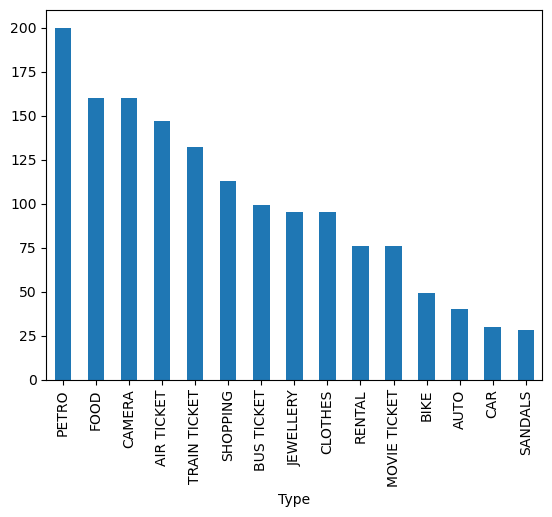

In [30]:
spend['Type'].value_counts(ascending=False).plot(kind='bar')

# g. Which city is having maximum spend?


<Axes: ylabel='Amount'>

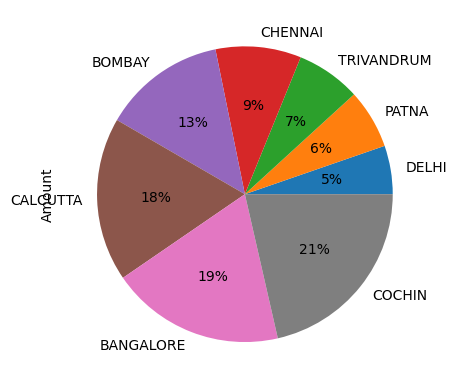

In [31]:
customer_spend.groupby("City")["Amount"].sum().sort_values().plot(kind='pie',autopct="%1.0f%%")

In [32]:
print('COCHIN is having maximum spend')

COCHIN is having maximum spend


# h. Which age group is spending more money?

In [33]:
customer_spend['Age Group'] = pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

<Axes: ylabel='Amount'>

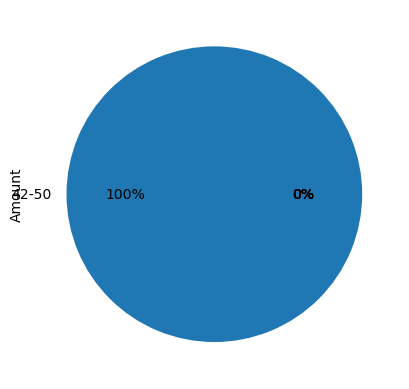

In [34]:
customer_spend.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).plot(kind='pie',autopct="%1.0f%%")

In [35]:
print('Age group of 42-50 is spending more money')

Age group of 42-50 is spending more money


# i. Who are the top 10 customers in terms of repayment

In [37]:
customer_repay.groupby('Customer')['Repayment_Amount'].sum().sort_values(ascending=False).head(10)

Customer
A61    722000000.0
A60    722000000.0
A39    480500000.0
A43    480500000.0
A12    480500000.0
A13    480500000.0
A14    480500000.0
A41    480500000.0
A40    480500000.0
A42    480500000.0
Name: Repayment_Amount, dtype: float64

# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [38]:
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])

customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot

C:\Users\DELL\AppData\Local\Temp\ipykernel_2292\2247650680.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])


Product                Gold   Platimum     Silver
City       Year                                  
BANGALORE  2004   9000000.0  1000030.5  1200015.5
           2005  14500000.0   920028.0  1100010.0
           2006  12500000.0   715023.0  1550016.5
BOMBAY     2004   6000000.0   890019.5   550000.0
           2005   9750000.0   740017.5   550001.5
           2006   9750000.0   965025.5   850000.0
CALCUTTA   2004   8500000.0  1920010.5   500006.0
           2005  10000000.0  3635013.5   400004.5
           2006  11000000.0  3170018.5   950010.5
CHENNAI    2004   1500000.0  3035000.0   250006.0
           2005   3000000.0  4815000.0   400012.0
           2006   2750000.0  4805000.0   350009.5
COCHIN     2004   8500000.0  3215013.5   800015.5
           2005  11500000.0  5570010.0   650016.0
           2006  11250000.0  5290017.5  1100018.5
DELHI      2004   3250000.0   300009.0   800010.0
           2005   2750000.0   450013.5   550007.0
           2006   2750000.0   150004.5   850010.0
PATNA      2004   1750000.0   750000.0   800006.0
           2005   3000000.0  2000000.0  1000007.0
           2006   2750000.0  1750000.0   700005.0
TRIVANDRUM 2004   2500000.0  2035003.0   250002.0
           2005   1750000.0  4070007.0   300003.0
           2006   2500000.0  1805005.5   550005.5

Text(0.5, 1.0, 'Amount spend by customers of different city on yearly basis ')

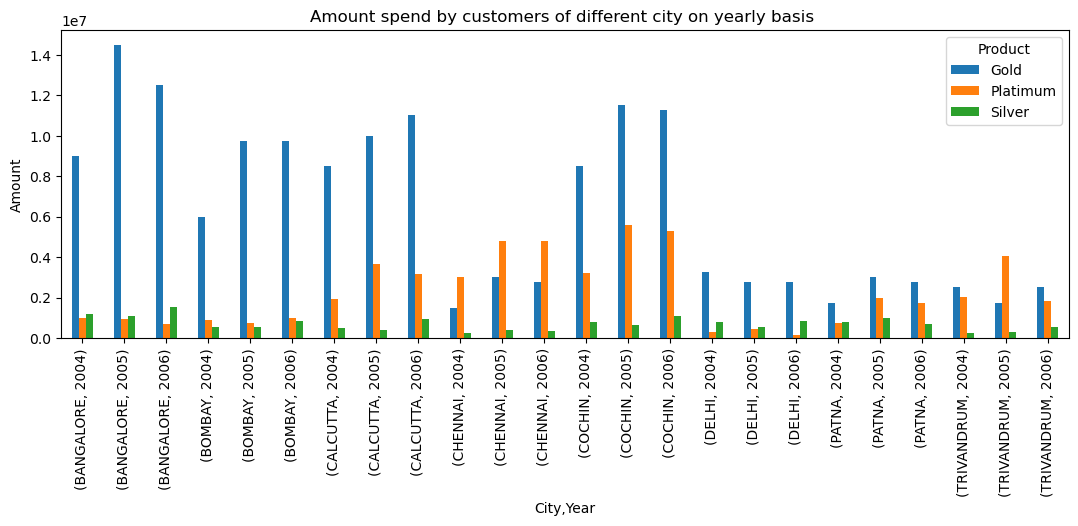

In [39]:

customer_spend_pivot.plot(kind='bar',figsize=(13,4))
plt.ylabel('Amount')
plt.title('Amount spend by customers of different city on yearly basis ')

# 4. Create graphs for

# a. Monthly comparison of total spends, city wise

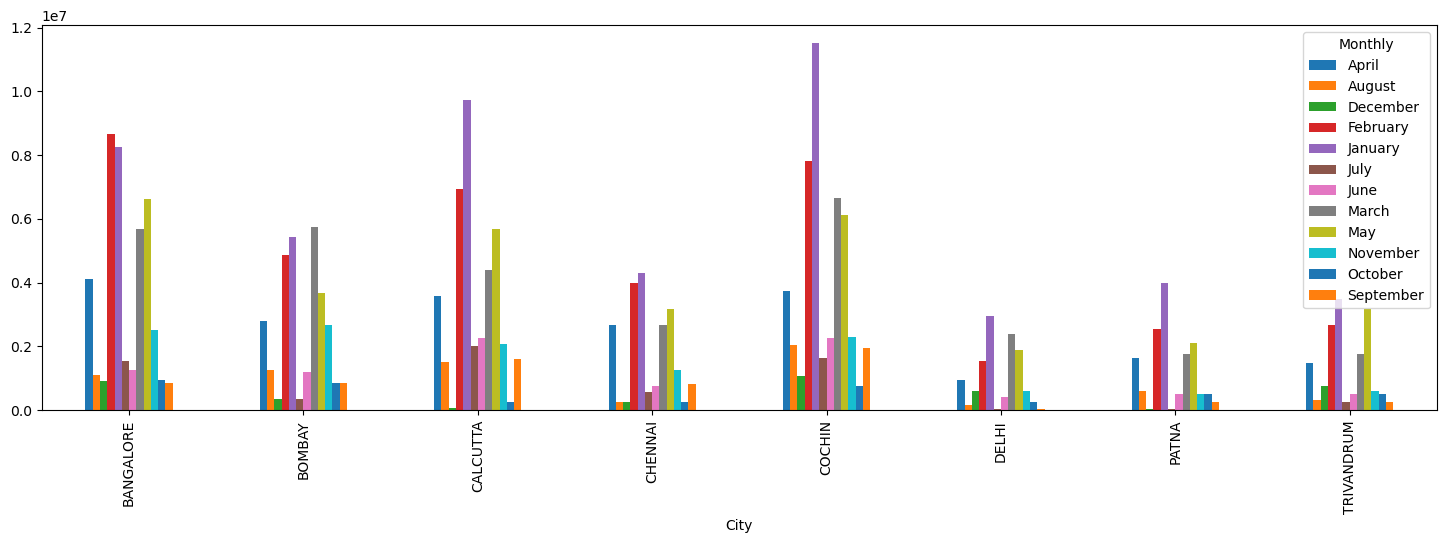

In [40]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()

month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')

month_city.plot(kind="bar",figsize=(18,5))
plt.show()


# b. Comparison of yearly spend on air tickets
 

In [41]:
customer_spend
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"] 
filtered


,Year,Type,Amount
0,2004,AIR TICKET,4970016.0
15,2005,AIR TICKET,10035018.0
30,2006,AIR TICKET,7490015.0


Text(0, 0.5, 'Amount')

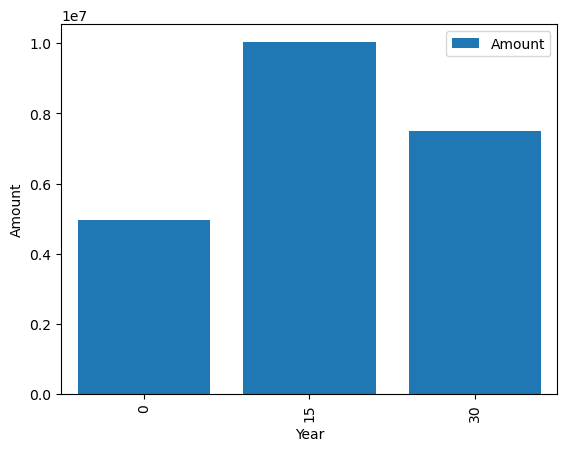

In [42]:
filtered.plot(kind='bar')
plt.bar(filtered["Year"],height=filtered["Amount"])
plt.xlabel('Year')
plt.ylabel('Amount')

# c. Comparison of monthly spend for each product 
(look for any seasonality that exists in terms of spend)


Text(0, 0.5, 'Amount')

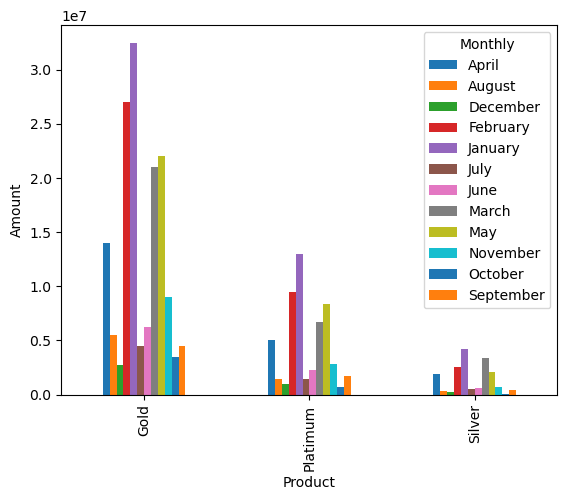

In [43]:
product = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product.plot(kind='bar')
plt.ylabel('Amount')

# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. 

The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customer

In [49]:
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount_Spend,SL No:,Repayment_Amount,Monthly,Yearly
0,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,NaN,500000.0,January,2004
1,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,2.0,500000.0,January,2004
2,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,3.0,500000.0,January,2004
3,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,4.0,500000.0,January,2004
4,1,A1,46.49,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,250000.0,5.0,500000.0,January,2004


In [47]:
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

#creating new column "Monthly" and "Yearly" using already existing 'Month' column

customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [50]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Repayment_Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [51]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April      August    December     February  \
Product City       Customer                                                    
Gold    BANGALORE  A1        18000000.0   9000000.0         NaN   45000000.0   
                   A13       46500000.0  15500000.0         NaN  124000000.0   
                   A14       46500000.0  15500000.0  15500000.0  108500000.0   
                   A30       27000000.0  13500000.0  27000000.0   67500000.0   
                   A43       62000000.0         NaN         NaN   62000000.0   
                   A63              NaN         NaN         NaN    1500000.0   
                   A81              NaN         NaN         NaN          NaN   
                   A88              NaN         NaN         NaN          NaN   
                   A92         500000.0         NaN         NaN          NaN   
        COCHIN     A11        9000000.0   9000000.0         NaN   36000000.0   
                   A16              NaN  10000000.0  10000000.0   20000000.0   
                   A32        7000000.0   7000000.0         NaN   21000000.0   
                   A45       31000000.0         NaN  15500000.0   62000000.0   
                   A61       57000000.0  57000000.0  19000000.0  114000000.0   
                   A65              NaN         NaN         NaN    1000000.0   
                   A90         500000.0         NaN         NaN          NaN   
                   A94              NaN         NaN         NaN          NaN   
        CALCUTTA   A10        9000000.0   9000000.0         NaN   36000000.0   
                   A15              NaN  10000000.0         NaN   40000000.0   
                   A29       40500000.0         NaN         NaN   67500000.0   
                   A31        7000000.0   7000000.0         NaN   14000000.0   
                   A60       57000000.0  38000000.0         NaN   95000000.0   
                   A89         500000.0         NaN         NaN          NaN   
        BOMBAY     A12       46500000.0  15500000.0         NaN   93000000.0   
                   A17              NaN  20000000.0         NaN   10000000.0   
                   A42       46500000.0  15500000.0  15500000.0   93000000.0   
                   A62       19000000.0   9500000.0         NaN   38000000.0   
                   A91         500000.0         NaN         NaN          NaN   
        CHENNAI    A27       81000000.0         NaN         NaN   67500000.0   
                   A67              NaN         NaN         NaN    1000000.0   
        TRIVANDRUM A28       40500000.0         NaN  27000000.0   67500000.0   
        PATNA      A26       54000000.0  27000000.0         NaN   54000000.0   
                   A66              NaN         NaN         NaN    1000000.0   
                   A95              NaN         NaN         NaN          NaN   
        DELHI      A44       31000000.0         NaN  15500000.0   62000000.0   
                   A64              NaN         NaN   1000000.0    1000000.0   
                   A82              NaN         NaN         NaN          NaN   
                   A93              NaN         NaN         NaN          NaN   

Monthly                          January        July        June        March  \
Product City       Customer                                                     
Gold    BANGALORE  A1         63000000.0         NaN         NaN          NaN   
                   A13        62000000.0  15500000.0  31000000.0   46500000.0   
                   A14        62000000.0  31000000.0  15500000.0   46500000.0   
                   A30        81000000.0  27000000.0  13500000.0   40500000.0   
                   A43        93000000.0         NaN         NaN  108500000.0   
                   A63               NaN         NaN         NaN          NaN   
                   A81               NaN         NaN         NaN     500000.0   
                   A88               NaN         NaN         NaN     5